In [1]:
from glob import glob
import random
import os

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# 1. Prepare data

In [2]:
ok_img_list = glob('data/ok_img/*')
len(ok_img_list)

100

In [3]:
ok_img_list

['data/ok_img/GCF31369ZE71CXC2D_HistEq_R.jpg',
 'data/ok_img/GCF31369ZE01CXC2L_HistEq_R.jpg',
 'data/ok_img/GCF31369ZEA1CXC2A_HistEq_R.jpg',
 'data/ok_img/GCF31369ZES1CXC2U_HistEq_R.jpg',
 'data/ok_img/GCF31369ZDK1CXC24_HistEq_R.jpg',
 'data/ok_img/GCF31369ZF91CXC28_HistEq_R.jpg',
 'data/ok_img/GCF31369ZE91CXC2B_HistEq_R.jpg',
 'data/ok_img/GCF31369ZDC1CXC2B_HistEq_R.jpg',
 'data/ok_img/GCF31369ZFG1CXC21_HistEq_R.jpg',
 'data/ok_img/GCF31369ZFS1CXC2R_HistEq_R.jpg',
 'data/ok_img/GCF31369ZEC1CXC28_HistEq_R.jpg',
 'data/ok_img/GCF31369ZFE1CXC23_HistEq_R.jpg',
 'data/ok_img/GCF31369ZGD1CXC21_HistEq_R.jpg',
 'data/ok_img/GCF31369ZF41CXC2D_HistEq_R.jpg',
 'data/ok_img/GCF31369ZFL1CXC2X_HistEq_R.jpg',
 'data/ok_img/GCF31369ZDG1CXC27_HistEq_R.jpg',
 'data/ok_img/GCF31369ZER1CXC2V_HistEq_R.jpg',
 'data/ok_img/GCF31369ZDP1CXC20_HistEq_R.jpg',
 'data/ok_img/GCF31369ZEF1CXC25_HistEq_R.jpg',
 'data/ok_img/GCF31369ZFP1CXC2U_HistEq_R.jpg',
 'data/ok_img/GCF31369ZEM1CXC2Z_HistEq_R.jpg',
 'data/ok_img

In [4]:
ng_img_list = glob('data/ng_img/*')
len(ng_img_list)

101

## Visualize data

In [5]:
def show_random_images(image_paths):
    image_paths = random.choices(image_paths, k=16)
    
    subplot_n_cols, subplot_n_rows = 4, 4

    plt.figure(figsize=(15,12))
    for idx, image_path in enumerate(image_paths):
        plt.subplot(subplot_n_rows, subplot_n_cols, idx+1)
        image = cv2.imread(os.path.join(image_path), cv2.IMREAD_GRAYSCALE)
        plt.imshow(image)

    plt.tight_layout()
    plt.show()

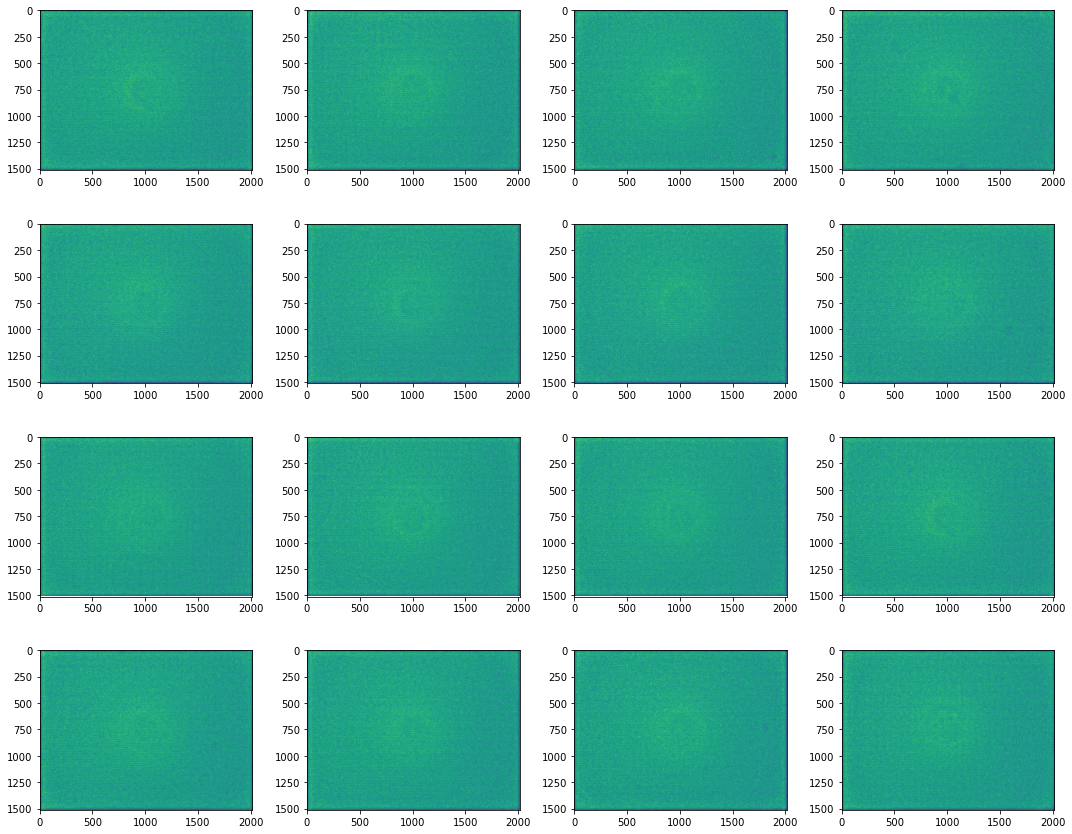

In [6]:
show_random_images(ok_img_list)

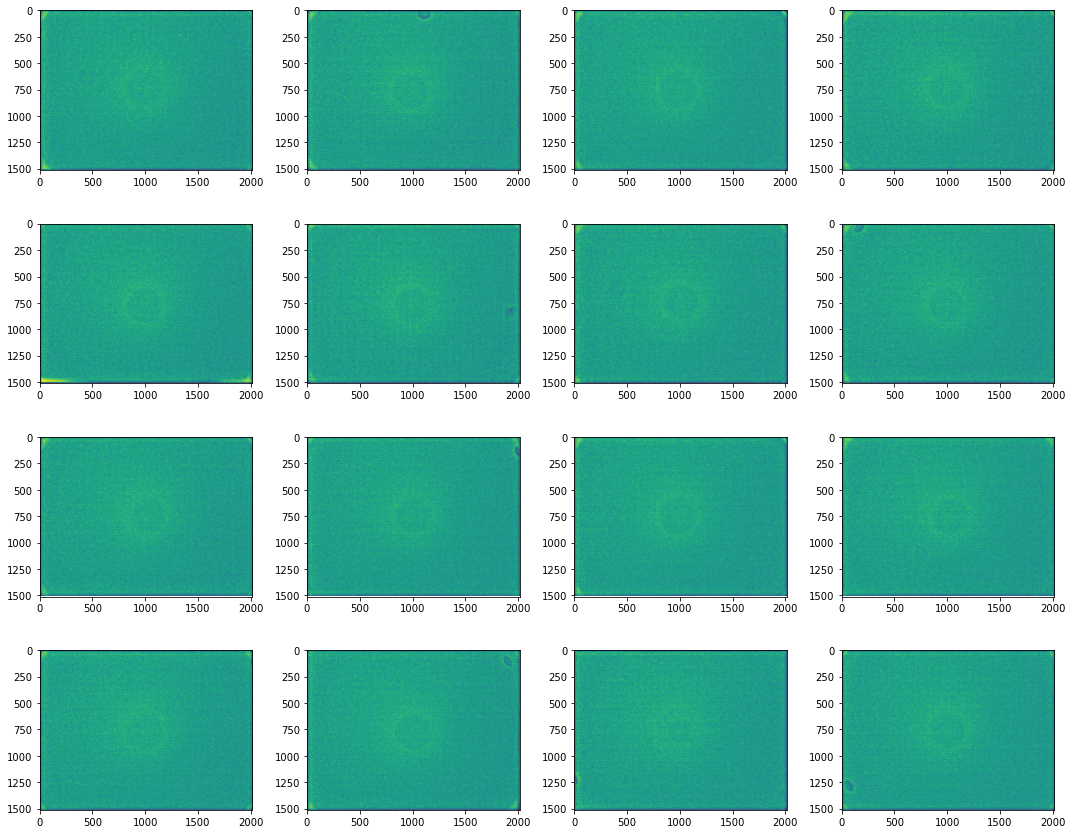

In [7]:
show_random_images(ng_img_list)

## Split data into train and val set

In [8]:
TRAIN_PERCENT = 0.8

In [9]:
shuffle_ok_img_list = random.sample(ok_img_list, len(ok_img_list))

ok_img_list_train = shuffle_ok_img_list[:int(TRAIN_PERCENT*len(ok_img_list))]
ok_img_list_val = shuffle_ok_img_list[int(TRAIN_PERCENT*len(ok_img_list)):]

ok_label_list_train = ['0'] * len(ok_img_list_train)
ok_label_list_val = ['0'] * len(ok_img_list_val)

In [10]:
len(ok_img_list_train), len(ok_label_list_train), len(ok_img_list_val), len(ok_label_list_val)

(80, 80, 20, 20)

In [11]:
shuffle_ng_img_list = random.sample(ng_img_list, len(ng_img_list))

ng_img_list_train = shuffle_ng_img_list[:int(TRAIN_PERCENT*len(ng_img_list))]
ng_img_list_val = shuffle_ng_img_list[int(TRAIN_PERCENT*len(ng_img_list)):]

ng_label_list_train = ['1'] * len(ng_img_list_train)
ng_label_list_val = ['1'] * len(ng_img_list_val)

In [12]:
len(ng_img_list_train), len(ng_label_list_train), len(ng_img_list_val), len(ng_label_list_val)

(80, 80, 21, 21)

In [13]:
img_list_train = ok_img_list_train + ng_img_list_train
label_list_train = ok_label_list_train + ng_label_list_train

img_list_val = ok_img_list_val + ng_img_list_val
label_list_val = ok_label_list_val + ng_label_list_val

In [14]:
len(img_list_train), len(label_list_train), len(img_list_val), len(label_list_val)

(160, 160, 41, 41)

In [15]:
img_list_train

['data/ok_img/GCF31369ZFS1CXC2R_HistEq_R.jpg',
 'data/ok_img/GCF31369ZDQ1CXC2Z_HistEq_R.jpg',
 'data/ok_img/GCF31369ZF91CXC28_HistEq_R.jpg',
 'data/ok_img/GCF31369ZGA1CXC24_HistEq_R.jpg',
 'data/ok_img/GCF31369ZFH1CXC20_HistEq_R.jpg',
 'data/ok_img/GCF31369ZDW1CXC2T_HistEq_R.jpg',
 'data/ok_img/GCF31369ZER1CXC2V_HistEq_R.jpg',
 'data/ok_img/GCF31369ZDF1CXC28_HistEq_R.jpg',
 'data/ok_img/GCF31369ZDZ1CXC2Q_HistEq_R.jpg',
 'data/ok_img/GCF31369ZFC1CXC25_HistEq_R.jpg',
 'data/ok_img/GCF31369ZEK1CXC21_HistEq_R.jpg',
 'data/ok_img/GCF31369ZG61CXC28_HistEq_R.jpg',
 'data/ok_img/GCF31369ZE11CXC2K_HistEq_R.jpg',
 'data/ok_img/GCF31369ZG51CXC29_HistEq_R.jpg',
 'data/ok_img/GCF31369ZFZ1CXC2J_HistEq_R.jpg',
 'data/ok_img/GCF31369ZFL1CXC2X_HistEq_R.jpg',
 'data/ok_img/GCF31369ZF51CXC2C_HistEq_R.jpg',
 'data/ok_img/GCF31369ZFY1CXC2K_HistEq_R.jpg',
 'data/ok_img/GCF31369ZF31CXC2E_HistEq_R.jpg',
 'data/ok_img/GCF31369ZEL1CXC20_HistEq_R.jpg',
 'data/ok_img/GCF31369ZEZ1CXC2M_HistEq_R.jpg',
 'data/ok_img

In [16]:
label_list_train

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1']

## Prepare Keras data generator

In [17]:
train_df = pd.DataFrame(data={
    'image_path': img_list_train,
    'label': label_list_train
})
train_df

,image_path,label
0,data/ok_img/GCF31369ZFS1CXC2R_HistEq_R.jpg,0
1,data/ok_img/GCF31369ZDQ1CXC2Z_HistEq_R.jpg,0
2,data/ok_img/GCF31369ZF91CXC28_HistEq_R.jpg,0
3,data/ok_img/GCF31369ZGA1CXC24_HistEq_R.jpg,0
4,data/ok_img/GCF31369ZFH1CXC20_HistEq_R.jpg,0
...,...,...
155,data/ng_img/GCF31472WG41CXC3T_HistEq_R.jpg,1
156,data/ng_img/GCF31470KE91CXC48_HistEq_R.jpg,1
157,data/ng_img/GCF31411ZM91CXC1K_HistEq_R.jpg,1
158,data/ng_img/GCF3147B8JV1CXC4N_HistEq_R.jpg,1


In [18]:
train_df = train_df.sample(frac=1)
train_df

,image_path,label
156,data/ng_img/GCF31470KE91CXC48_HistEq_R.jpg,1
107,data/ng_img/GCF3147681N1CXC3W_HistEq_R.jpg,1
15,data/ok_img/GCF31369ZFL1CXC2X_HistEq_R.jpg,0
103,data/ng_img/GCF31474K061CXC3A_HistEq_R.jpg,1
31,data/ok_img/GCF31369ZDN1CXC21_HistEq_R.jpg,0
...,...,...
102,data/ng_img/GCFGTC00070000007G+3089+Q_HistEq_R...,1
39,data/ok_img/GCF31369ZDV1CXC2U_HistEq_R.jpg,0
42,data/ok_img/GCF31369ZGF1CXC2Z_HistEq_R.jpg,0
19,data/ok_img/GCF31369ZEL1CXC20_HistEq_R.jpg,0


In [19]:
val_df = pd.DataFrame(data={
    'image_path': img_list_val,
    'label': label_list_val
})
val_df

,image_path,label
0,data/ok_img/GCF31369ZFW1CXC2M_HistEq_R.jpg,0
1,data/ok_img/GCF31369ZFT1CXC2Q_HistEq_R.jpg,0
2,data/ok_img/GCF31369ZF71CXC2A_HistEq_R.jpg,0
3,data/ok_img/GCF31369ZG21CXC2C_HistEq_R.jpg,0
4,data/ok_img/GCF31369ZDS1CXC2X_HistEq_R.jpg,0
5,data/ok_img/GCF31369ZG91CXC25_HistEq_R.jpg,0
6,data/ok_img/GCF31369ZF61CXC2B_HistEq_R.jpg,0
7,data/ok_img/GCF31369ZG01CXC2E_HistEq_R.jpg,0
8,data/ok_img/GCF31369ZFB1CXC26_HistEq_R.jpg,0
9,data/ok_img/GCF31369ZDU1CXC2V_HistEq_R.jpg,0


In [20]:
val_df = val_df.sample(frac=1)
val_df

,image_path,label
11,data/ok_img/GCF31369ZDJ1CXC25_HistEq_R.jpg,0
20,data/ng_img/GCF3147DYR81CXC2Y_HistEq_R.jpg,1
12,data/ok_img/GCF31369ZEC1CXC28_HistEq_R.jpg,0
27,data/ng_img/GCF31473P4E1CXC1V_HistEq_R.jpg,1
9,data/ok_img/GCF31369ZDU1CXC2V_HistEq_R.jpg,0
26,data/ng_img/GCF314719F41CXC4H_HistEq_R.jpg,1
14,data/ok_img/GCF31369ZDE1CXC29_HistEq_R.jpg,0
24,data/ng_img/GCF31474GK11CXC3V_HistEq_R.jpg,1
38,data/ng_img/GCF31477FL01CXC3K_HistEq_R.jpg,1
21,data/ng_img/GCF314767YS1CXC32_HistEq_R.jpg,1


In [21]:
IMAGE_SIZE = 256
BATCH_SIZE = 4

In [22]:
train_dataset = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True
).flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 160 validated image filenames belonging to 2 classes.


In [23]:
val_dataset = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True
).flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE * 2,
    class_mode='categorical'
)

Found 41 validated image filenames belonging to 2 classes.


# 2. Prepare model

In [24]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
#     Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),

    Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
#     Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),

    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
#     Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),

    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
#     Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),

    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
#     Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, strides=2),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(rate=0.3),
    Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        1

2023-05-06 11:32:29.997524: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 3. Compile and train model

In [25]:
bce_loss = BinaryCrossentropy()

In [26]:
# sgd_opt = SGD(learning_rate=0.01)
adam_opt = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-07)

In [27]:
os.makedirs('ckpt', exist_ok=True)
checkpoint = ModelCheckpoint('ckpt/model_img_classification_{epoch:02d}.h5')

In [28]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    min_lr=1e-10
)

In [29]:
model.compile(loss=bce_loss, optimizer=adam_opt, metrics=[CategoricalAccuracy()])

In [30]:
NUM_EPOCH = 10

In [31]:
history = model.fit(
    x=train_dataset,
    epochs=NUM_EPOCH,
    validation_data=val_dataset,
    shuffle=True,
    callbacks=[reduce_lr]
)

/Users/minhnguyenhuu/miniconda3/envs/work_env/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/minhnguyenhuu/miniconda3/envs/work_env/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
2023-05-06 11:32:30.492060: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
40/40 [==============================] - 17s 399ms/step - loss: 0.6936 - categorical_accuracy: 0.4645 - val_loss: 0.6931 - val_categorical_accuracy: 0.4878
Epoch 2/10
40/40 [==============================] - 15s 368ms/step - loss: 0.6931 - categorical_accuracy: 0.5696 - val_loss: 0.6931 - val_categorical_accuracy: 0.4878
Epoch 3/10
40/40 [==============================] - 16s 388ms/step - loss: 0.6931 - categorical_accuracy: 0.4842 - val_loss: 0.6931 - val_categorical_accuracy: 0.4878
Epoch 4/10
40/40 [==============================] - 16s 394ms/step - loss: 0.6931 - categorical_accuracy: 0.4570 - val_loss: 0.6931 - val_categorical_accuracy: 0.4878
Epoch 5/10
40/40 [==============================] - 17s 425ms/step - loss: 0.6931 - categorical_accuracy: 0.5289 - val_loss: 0.6931 - val_categorical_accuracy: 0.4878
Epoch 6/10
40/40 [==============================] - 20s 501ms/step - loss: 0.6931 - categorical_accuracy: 0.5087 - val_loss: 0.6931 - val_categorical_accuracy: 0.487

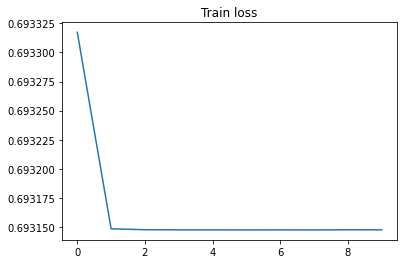

In [32]:
sns.lineplot(x=range(NUM_EPOCH), y=history.history['loss'])
plt.title('Train loss')
plt.show()

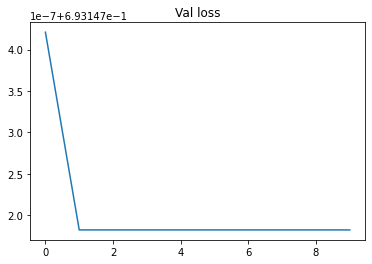

In [33]:
sns.lineplot(x=range(NUM_EPOCH), y=history.history['val_loss'])
plt.title('Val loss')
plt.show()

In [34]:
pred_prob = model.predict(val_dataset)
pred_prob

/Users/minhnguyenhuu/miniconda3/envs/work_env/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/minhnguyenhuu/miniconda3/envs/work_env/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


array([[0.5000948 ],
       [0.50004697],
       [0.5000004 ],
       [0.49993846],
       [0.4999061 ],
       [0.4999417 ],
       [0.5000605 ],
       [0.50013465],
       [0.49993464],
       [0.499934  ],
       [0.49991265],
       [0.49987426],
       [0.5000229 ],
       [0.5000391 ],
       [0.4999926 ],
       [0.4998031 ],
       [0.4999162 ],
       [0.5000044 ],
       [0.5000622 ],
       [0.5002069 ],
       [0.49994868],
       [0.500077  ],
       [0.4999354 ],
       [0.49985114],
       [0.4999675 ],
       [0.4999407 ],
       [0.49992526],
       [0.49983397],
       [0.4999461 ],
       [0.4999048 ],
       [0.4998581 ],
       [0.5000315 ],
       [0.5000686 ],
       [0.49998564],
       [0.4999626 ],
       [0.5000434 ],
       [0.49999046],
       [0.49996898],
       [0.49974743],
       [0.49997056],
       [0.49998862]], dtype=float32)

In [35]:
CONFIDENCE_THRESHOLD = 0.5

In [36]:
y_pred = np.where(pred_prob > CONFIDENCE_THRESHOLD, 1, 0)
y_pred = y_pred.squeeze()
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [37]:
y_label_idx = [int(i) for i in val_df.label.to_list()]

In [38]:
print(classification_report(y_label_idx, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.60      0.51        20
           1       0.43      0.29      0.34        21

    accuracy                           0.44        41
   macro avg       0.44      0.44      0.43        41
weighted avg       0.44      0.44      0.42        41

